## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',150)
%matplotlib inline

In [2]:
flight_path = 'flight_data/'
weather_path = 'weather_data/'

In [3]:
airport_codes = ['ORD', 'JFK', 'ATL','LAX','DFW','DEN','SFO','LAS','SEA','CLT',
                 'MCO','MIA','PHX','EWR','IAH','IAH','LGA','MSP','DTW','PHL','BOS']

### <center>Not require to run

In [6]:
#all_flight_files = os.listdir(flight_path)

In [7]:
#all_flight_files

['2017_2.csv',
 '2017_7.csv',
 '2018_11.csv',
 '2016_10.csv',
 '2017_4.csv',
 '2016_6.csv',
 '2016_3.csv',
 '2017_3.csv',
 '2018_4.csv',
 '2018_7.csv',
 '2017_10.csv',
 '2016_2.csv',
 '2018_8.csv',
 '2018_6.csv',
 '2017_5.csv',
 '2016_1.csv',
 '2018_9.csv',
 '2017_12.csv',
 '2017_1.csv',
 '2018_2.csv',
 '2018_3.csv',
 '2017_9.csv',
 '2018_12.csv',
 '2016_7.csv',
 '2018_1.csv',
 '2018_5.csv',
 '2016_4.csv',
 '2016_9.csv',
 '2017_6.csv',
 '2017_11.csv',
 '2016_5.csv',
 '2018_10.csv',
 '2016_11.csv',
 '2016_12.csv',
 '2017_8.csv',
 '2016_8.csv']

In [8]:
#len(all_flight_files)

36

In [ ]:
#all_data =[pd.read_csv(os.path.join(flight_path, all_flight_files[i])) for i in range(len(all_flight_files))]

In [4]:
'''
df = pd.DataFrame([])
for i in tqdm(range(len(all_data))):
    for air in airport_codes:
        df = pd.concat([df, all_data[i][all_data[i]['ORIGIN'] == air]])
'''        

"\ndf = pd.DataFrame([])\nfor i in tqdm(range(len(all_data))):\n    for air in airport_codes:\n        df = pd.concat([df, all_data[i][all_data[i]['ORIGIN'] == air]])\n"

In [5]:
#df.shape

In [ ]:
#df.info()

In [6]:
'''
df = df[['FL_DATE',
    'ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_NM',
    'DEST','DEST_CITY_NAME','DEST_STATE_NM',
    'CANCELLED','CANCELLATION_CODE',
    'CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE',
   'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]
'''   

"\ndf = df[['FL_DATE',\n    'ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_NM',\n    'DEST','DEST_CITY_NAME','DEST_STATE_NM',\n    'CANCELLED','CANCELLATION_CODE',\n    'CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE',\n   'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]\n"

In [7]:
#df.to_csv('features_set_top_20.csv',index=False)

### <center>Up to this

In [89]:
df = pd.read_csv('features_set_top_20.csv')

In [90]:
df.head()

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-02-01,ORD,"Chicago, IL",Illinois,SFO,"San Francisco, CA",California,0.0,NaN,298.0,336.0,280.0,1846.0,0.0,0.0,31.0,0.0,0.0
1,2017-02-01,ORD,"Chicago, IL",Illinois,DEN,"Denver, CO",Colorado,0.0,NaN,170.0,186.0,148.0,888.0,10.0,0.0,16.0,0.0,0.0
2,2017-02-01,ORD,"Chicago, IL",Illinois,TPA,"Tampa, FL",Florida,0.0,NaN,172.0,165.0,123.0,1012.0,NaN,NaN,NaN,NaN,NaN
3,2017-02-01,ORD,"Chicago, IL",Illinois,PHX,"Phoenix, AZ",Arizona,0.0,NaN,235.0,259.0,215.0,1440.0,0.0,0.0,15.0,0.0,0.0
4,2017-02-01,ORD,"Chicago, IL",Illinois,SLC,"Salt Lake City, UT",Utah,0.0,NaN,214.0,233.0,204.0,1250.0,0.0,0.0,17.0,0.0,0.0


In [91]:
df['CANCELLED'].value_counts()

0.0    10218590
1.0      145283
Name: CANCELLED, dtype: int64

In [92]:
df['CANCELLATION_CODE'].value_counts()

B    80312
A    34750
C    30049
D      172
Name: CANCELLATION_CODE, dtype: int64

In [93]:
CANCELLATION_CODE_dict  = {"A":"Carrier","B":"Weather","C":"National Air System","D":"Security"}

In [94]:
all_cncl_reason = [CANCELLATION_CODE_dict.get(item,item)  for item in df['CANCELLATION_CODE'].value_counts().index]
cncl_count = df['CANCELLATION_CODE'].value_counts().values

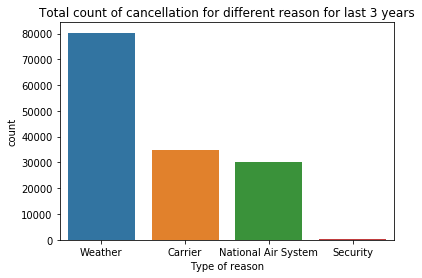

In [95]:
ax = sns.barplot(x=all_cncl_reason, y=cncl_count)
plt.xlabel('Type of reason')
plt.ylabel('count')
plt.title('Total count of cancellation for different reason for last 3 years')
plt.show()

In [96]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [101]:
df.head(1)

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-02-01,ORD,"Chicago, IL",Illinois,SFO,"San Francisco, CA",California,0.0,NaN,298.0,336.0,280.0,1846.0,0.0,0.0,31.0,0.0,0.0


In [102]:
df['Delay'] = 0

In [103]:
df.loc[(df['CARRIER_DELAY'] > 0) | (df['WEATHER_DELAY'] > 0) | (df['WEATHER_DELAY'] > 0) |
       (df['SECURITY_DELAY'] > 0) | (df['LATE_AIRCRAFT_DELAY'] > 0),'Delay'] = 1

In [104]:
df['Delay'].value_counts()

0    8799320
1    1564553
Name: Delay, dtype: int64

In [105]:
df['status'] = 1

In [106]:
df.loc[(df['CANCELLATION_CODE'] == 'B') ,'status'] = -1

In [107]:
df['status'].value_counts()

 1    10283561
-1       80312
Name: status, dtype: int64

In [108]:
sch_df = df[df['status']==1]
#sch_df = sch_df.sample(frac=1, random_state=1).head(1000000)
sch_df.shape

(10283561, 20)

In [109]:
#delay_df = new_df[new_df['status']==1]
cancel_df = df[df['status']==-1]

In [110]:
df = pd.concat([sch_df,cancel_df])
df = df.sample(frac=1, random_state=1)

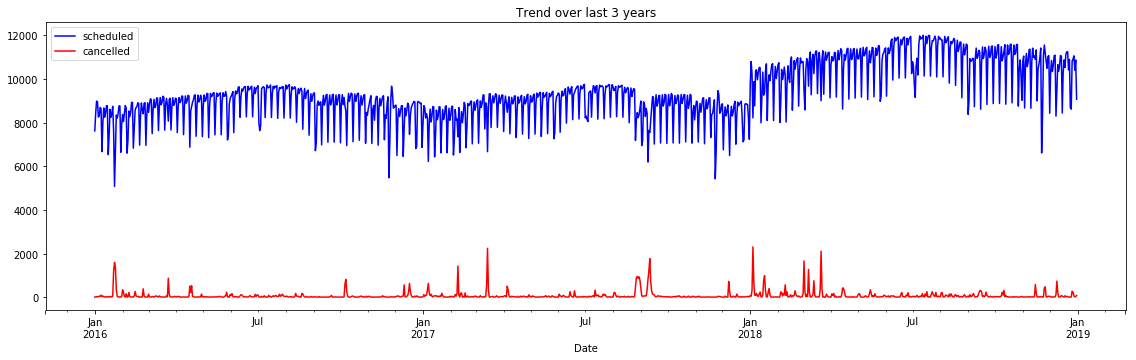

In [111]:
fig = plt.figure(figsize=(15,4));

ax = fig.add_axes([0,0,1,1]);

df[df['status'] ==1].groupby('FL_DATE')['ORIGIN'].count().plot.line(c='b', label="scheduled");
df[df['status'] ==-1].groupby('FL_DATE').count()['ORIGIN'].plot.line(c='r', label="cancelled");
#new_df[new_df['status'] ==2].groupby('FL_DATE').count()['ORIGIN'].plot.line(c='g', label="cancelled");
plt.xlabel('Date')
plt.title('Trend over last 3 years')

ax.legend();

In [112]:
df['status'].value_counts()

 1    10283561
-1       80312
Name: status, dtype: int64

In [113]:
city_weather_list = os.listdir(weather_path)

In [114]:
weather_path

'weather_data/'

In [115]:
df.FL_DATE = pd.to_datetime(df.FL_DATE)
df.set_index('FL_DATE', inplace=True)

In [117]:
df['Month'] = df.index.month
df['Date'] = df.index.date

In [118]:
def make_col_to_str(df):
    for col in df.columns:
        df[col] = df[col].apply(str)
        
    return df


def remove_letters(df):
    for col in df.columns:
            #df = df[df[col] != 'T']
            #df[col] = df[col].str.sub("\D", "", "aas30dsa20")
            #df[col].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
        df[col] = df[col].str.replace(r'[A-Za-z]','')
    return df


def to_float(x):
    try:
        return float(x)
    except:
        return float(''.join(list(x)[:-1]))
def make_col_numeric(df):
    for col in df.columns:
            print(col)
            df[col] = df[col].apply(to_float)
        
    return df

In [119]:
all_feature_df_list = []
reqd_cols = ['DATE','HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature']

for index,i in enumerate(tqdm(city_weather_list)):
    weather_df = pd.read_csv(weather_path+i,low_memory=False)
    weather_df = weather_df[reqd_cols]
    weather_df.DATE = pd.to_datetime(weather_df.DATE)
    weather_df.set_index('DATE', inplace=True)
    weather_df = make_col_to_str(weather_df)
    weather_df = remove_letters(weather_df)
    #weather_df = make_col_numeric(weather_df)
    weather_df = weather_df.apply(pd.to_numeric, errors='coerce')  
    weather_df.fillna(weather_df.mean(), inplace=True)
    weather_df = weather_df.groupby(weather_df.index.date).mean()
    city_code = i.split('_')[1][:-4]
    temp_city_w = pd.merge(df[df.ORIGIN==city_code], weather_df, how='left', left_index=True, right_index=True)
    all_feature_df_list.append(temp_city_w)

100%|██████████| 20/20 [02:14<00:00,  6.32s/it]


In [120]:
final_df = pd.concat(all_feature_df_list)

In [121]:
final_df = final_df.sample(frac=1, random_state=1)

In [122]:
final_df.isnull().sum(axis=0)

ORIGIN                              0
ORIGIN_CITY_NAME                    0
ORIGIN_STATE_NM                     0
DEST                                0
DEST_CITY_NAME                      0
DEST_STATE_NM                       0
CANCELLED                           0
CANCELLATION_CODE            10218590
CRS_ELAPSED_TIME                   12
ACTUAL_ELAPSED_TIME            170199
AIR_TIME                       170199
DISTANCE                            0
CARRIER_DELAY                 8380934
WEATHER_DELAY                 8380934
NAS_DELAY                     8380934
SECURITY_DELAY                8380934
LATE_AIRCRAFT_DELAY           8380934
Delay                               0
status                              0
Month                               0
Date                                0
HourlyDewPointTemperature           0
HourlyDryBulbTemperature            0
HourlyPrecipitation                 0
HourlyRelativeHumidity              0
HourlyStationPressure               0
HourlyVisibi

In [123]:
final_df.dropna(axis=1,inplace=True)

In [124]:
df = final_df.copy()

In [125]:
df.head(2)

,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CANCELLED,DISTANCE,Delay,status,Month,Date,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature
2016-11-16,DFW,"Dallas/Fort Worth, TX",Texas,LGA,"New York, NY",New York,0.0,1389.0,0,1,11,2016-11-16,48.008287,69.664524,0.002465,51.039878,29.284557,9.962225,57.533681
2017-03-19,IAH,"Houston, TX",Texas,ORD,"Chicago, IL",Illinois,0.0,925.0,0,1,3,2017-03-19,63.632470,72.527653,0.002963,75.860489,30.109542,9.583841,66.879557


In [126]:
df['status'].value_counts()

 1    10283561
-1       80312
Name: status, dtype: int64

In [127]:
df.shape

(10363873, 19)

In [128]:
df = df.sample(frac=1, random_state=1)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10363873 entries, 2017-05-03 to 2016-10-11
Data columns (total 19 columns):
ORIGIN                       object
ORIGIN_CITY_NAME             object
ORIGIN_STATE_NM              object
DEST                         object
DEST_CITY_NAME               object
DEST_STATE_NM                object
CANCELLED                    float64
DISTANCE                     float64
Delay                        int64
status                       int64
Month                        int64
Date                         object
HourlyDewPointTemperature    float64
HourlyDryBulbTemperature     float64
HourlyPrecipitation          float64
HourlyRelativeHumidity       float64
HourlyStationPressure        float64
HourlyVisibility             float64
HourlyWetBulbTemperature     float64
dtypes: float64(9), int64(3), object(7)
memory usage: 1.5+ GB


In [130]:
categorical_features = list(df.select_dtypes(include=['O']).columns)
for column in categorical_features:
    df[column] = df[column].astype('category')

In [131]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)

In [132]:
df['status'].value_counts()

 1    10283561
-1       80312
Name: status, dtype: int64

In [133]:
df.columns

Index(['ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'CANCELLED', 'DISTANCE', 'Delay',
       'status', 'Month', 'Date', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyRelativeHumidity', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature'],
      dtype='object')

In [134]:
X = df.drop(['status','CANCELLED','Delay'],axis=1)
y = df['status']

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [136]:
X = StandardScaler().fit_transform(X)

/home/bat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bat/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
import numpy as np
import itertools
#plt.grid(b=None)


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [141]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)

In [142]:
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')

clf.fit(X_train)
y_pred = clf.predict(X_test)
#y_pred_test = clf.predict(X)

In [143]:
accuracy_score(y_test,y_pred)

0.7667133459112134

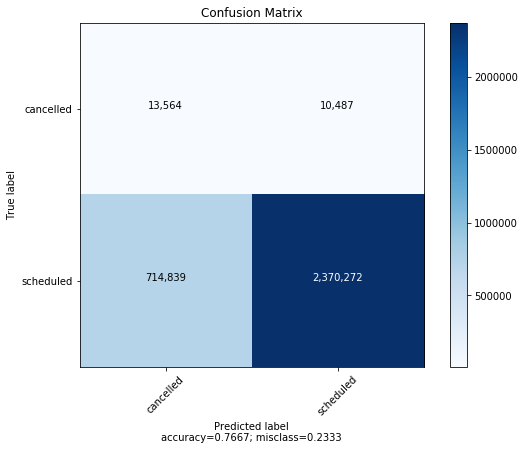

In [144]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['cancelled','scheduled'],
                      title        = "Confusion Matrix")

In [53]:
16943 /(16943 + 26494)

0.3900591661486751

In [69]:
13101/ (13101 + 10952)

0.5446721822641666